In [13]:
# This script is used to understand Overfitting.

url="https://raw.githubusercontent.com/sameerCoder/ML_Datasets/main/winequality-red.csv"
''' 
Based on wine different attributes, we are required to predict the quality of red wine
which is a value between 0 and 10.'''

' \nBased on wine different attributes, we are required to predict the quality of red wine\nwhich is a value between 0 and 10.'

In [14]:
import pandas as pd
df=pd.read_csv(url,delimiter=';')
print(df.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]


In [15]:
print(" Original quality:\n",df['quality'].head())

 Original quality:
 0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64


In [16]:
'''
We can treat this problem either as a classification problem or as a regression
problem since wine quality is nothing but a real number between 0 and 10.'''
# A Mapping dictionary that maps the quality values from 0 to 5
quality_mapping={
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}
# use map function of pandas with any dicitionary to convert the values in a given .
# column to values in the dictionary.
df.loc[:,'quality']=df.quality.map(quality_mapping)
print("After using map function:\n",df['quality'].head())
# Converting 5 to 2 , 3 to 0 , 4 to 1.

After using map function:
 0    2
1    2
2    2
3    3
4    2
Name: quality, dtype: int64


In [17]:
#let’s divide the data into two parts. 
#This dataset has 1599 samples. We keep 1000 samples for training and 599 as a separate set.
# use sample with frac=1 to shuffle the dataframe.
# we reset the indices since they change after
# shuffling the dataframe
df=df.sample(frac=1).reset_index(drop=True)

# top 1000 rows are selected for training.
df_train=df.head(1000)

# bottom 599 values are selected
# for testing/validation
df_test=df.tail(599)

In [18]:
# max depth =3

# import from scikit-learn
from sklearn import tree
from sklearn import metrics

#initialize decision tree classifier class
# with a max_depth of 3
clf=tree.DecisionTreeClassifier(max_depth=3)

#choose the columns you want to train on
# these are the features for the model
cols=['fixed acidity','volatile acidity','citric acid',
      'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH',
      'sulphates','alcohol']
  # train the model on the provided features
  # and mapped quality from before
clf.fit(df_train[cols],df_train.quality)
#I have used a max_depth of 3 for the decision tree classifier. I have left all other parameters of this model to its default value.

DecisionTreeClassifier(max_depth=3)

In [19]:
 #CASE 1
 #testing
train_predictions=clf.predict(df_train[cols])
 #generate predictions on the test set
test_predictions=clf.predict(df_test[cols])
#calcuate the accuracy of predictions on training data set
train_accuracy=metrics.accuracy_score(df_train.quality,train_predictions)
#calculate the accuracy of predictions on test data set
test_accuracy=metrics.accuracy_score(df_test.quality,test_predictions)

print("train_accuracy:",train_accuracy,"test_accuracy:",test_accuracy)

train_accuracy: 0.614 test_accuracy: 0.5909849749582637


In [20]:
# TO IMPROVE THE ACCURACY.
# max depth =8

# import from scikit-learn
from sklearn import tree
from sklearn import metrics

#initialize decision tree classifier class
# with a max_depth of 3
clf=tree.DecisionTreeClassifier(max_depth=8)

#choose the columns you want to train on
# these are the features for the model
cols=['fixed acidity','volatile acidity','citric acid',
      'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH',
      'sulphates','alcohol']
  # train the model on the provided features
  # and mapped quality from before
clf.fit(df_train[cols],df_train.quality)
#I have used a max_depth of 3 for the decision tree classifier. 
#I have left all other parameters of this model to its default value.

DecisionTreeClassifier(max_depth=8)

In [21]:
 #CASE 2
 #testing
train_predictions=clf.predict(df_train[cols])
 #generate predictions on the test set
test_predictions=clf.predict(df_test[cols])
#calcuate the accuracy of predictions on training data set
train_accuracy=metrics.accuracy_score(df_train.quality,train_predictions)
#calculate the accuracy of predictions on test data set
test_accuracy=metrics.accuracy_score(df_test.quality,test_predictions)
print("train_accuracy:",train_accuracy,"test_accuracy:",test_accuracy)

train_accuracy: 0.847 test_accuracy: 0.6010016694490818


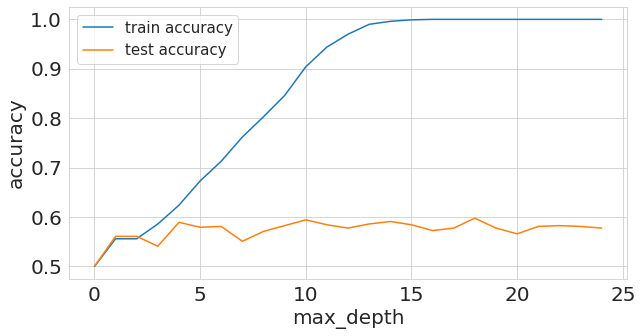

In [4]:
########### CHECKING MULITPLE loop DEPTH #############
from sklearn import tree
from sklearn import metrics

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# our global size of label text
matplotlib.rc('xtick',labelsize=20)
matplotlib.rc('ytick',labelsize=20)

%matplotlib inline
# initialize lists to store accuracies #for training and test data.
train_accuracies=[0.5]
test_accuracies=[0.5]

import pandas as pd
url="https://raw.githubusercontent.com/sameerCoder/ML_Datasets/main/winequality-red.csv"
df=pd.read_csv(url,delimiter=';')

quality_mapping={
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}
# use map function of pandas with any dicitionary to convert the values in a given .
# column to values in the dictionary.
df.loc[:,'quality']=df.quality.map(quality_mapping)

# shuffling the dataframe
df=df.sample(frac=1).reset_index(drop=True)

# top 1000 rows are selected for training.
df_train=df.head(1000)

# bottom 599 values are selected
# for testing/validation
df_test=df.tail(599)
cols=['fixed acidity','volatile acidity','citric acid',
      'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH',
      'sulphates','alcohol']



# iterate over a few depth values
for depth in range(1,25):
  # initalize the model
  clf=tree.DecisionTreeClassifier(max_depth=depth)
  cols = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol']

    # fit the model on given features
  clf.fit(df_train[cols],df_train.quality)
   # create  training & test predictions
  train_predictions=clf.predict(df_train[cols])
  test_predictions = clf.predict(df_test[cols])
  # calculate trainig & test accuracies.
  train_accuracy=metrics.accuracy_score(df_train.quality,train_predictions)
  test_accuracy=metrics.accuracy_score(df_test.quality,test_predictions)
  #append accuracies
  train_accuracies.append(train_accuracy)
  test_accuracies.append(test_accuracy)
# create two plots using matplotlib
# and seaborn
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

In [ ]:
#overfitting - Train Result is best but Test Result is worst.
We see that the best score for test data is obtained when max_depth has a value of
14. As we keep increasing the value of this parameter, test accuracy remains the
same or gets worse, but the training accuracy keeps increasing. It means that our
simple decision tree model keeps learning about the training data better and better
with an increase in max_depth, but the performance on test data does not improve
at all.

In [ ]:
#The model fits perfectly on the training set and performs poorly when it comes to the test set. 
#This means that the model will learn the training data well but will not generalize on unseen samples.